In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('drive/MyDrive/Sentiment/train.csv',
                 encoding = 'latin',header=None)
df=data.sample(n=10000)
df.head()

,0,1,2,3,4,5
603386,0,2221650802,Thu Jun 18 05:46:20 PDT 2009,NO_QUERY,Camille_san,@maddysen oh yeah it wouldnt send to you coz y...
788270,0,2325100076,Thu Jun 25 04:46:03 PDT 2009,NO_QUERY,GrumpyTart,@tgp_taxi7_andy Can't reply to DM as you're no...
364310,0,2048116357,Fri Jun 05 14:41:17 PDT 2009,NO_QUERY,MegzpooCarter,my stupid ears are giving me a pounding headache
798735,0,2328703384,Thu Jun 25 09:53:41 PDT 2009,NO_QUERY,ChickAndi07,Farrah Fawcett has passed away May she Rest I...
1478478,4,2066483898,Sun Jun 07 10:36:24 PDT 2009,NO_QUERY,hanwedge,is getting a bit obsessed with Il Divo and po...


In [ ]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
603386,0,2221650802,Thu Jun 18 05:46:20 PDT 2009,NO_QUERY,Camille_san,@maddysen oh yeah it wouldnt send to you coz y...
788270,0,2325100076,Thu Jun 25 04:46:03 PDT 2009,NO_QUERY,GrumpyTart,@tgp_taxi7_andy Can't reply to DM as you're no...
364310,0,2048116357,Fri Jun 05 14:41:17 PDT 2009,NO_QUERY,MegzpooCarter,my stupid ears are giving me a pounding headache
798735,0,2328703384,Thu Jun 25 09:53:41 PDT 2009,NO_QUERY,ChickAndi07,Farrah Fawcett has passed away May she Rest I...
1478478,4,2066483898,Sun Jun 07 10:36:24 PDT 2009,NO_QUERY,hanwedge,is getting a bit obsessed with Il Divo and po...


In [ ]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [ ]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
603386,Negative,@maddysen oh yeah it wouldnt send to you coz y...
788270,Negative,@tgp_taxi7_andy Can't reply to DM as you're no...
364310,Negative,my stupid ears are giving me a pounding headache
798735,Negative,Farrah Fawcett has passed away May she Rest I...
1478478,Positive,is getting a bit obsessed with Il Divo and po...


Text(0.5, 1.0, 'Sentiment Data Distribution')

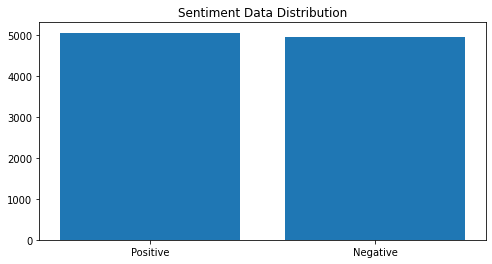

In [ ]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

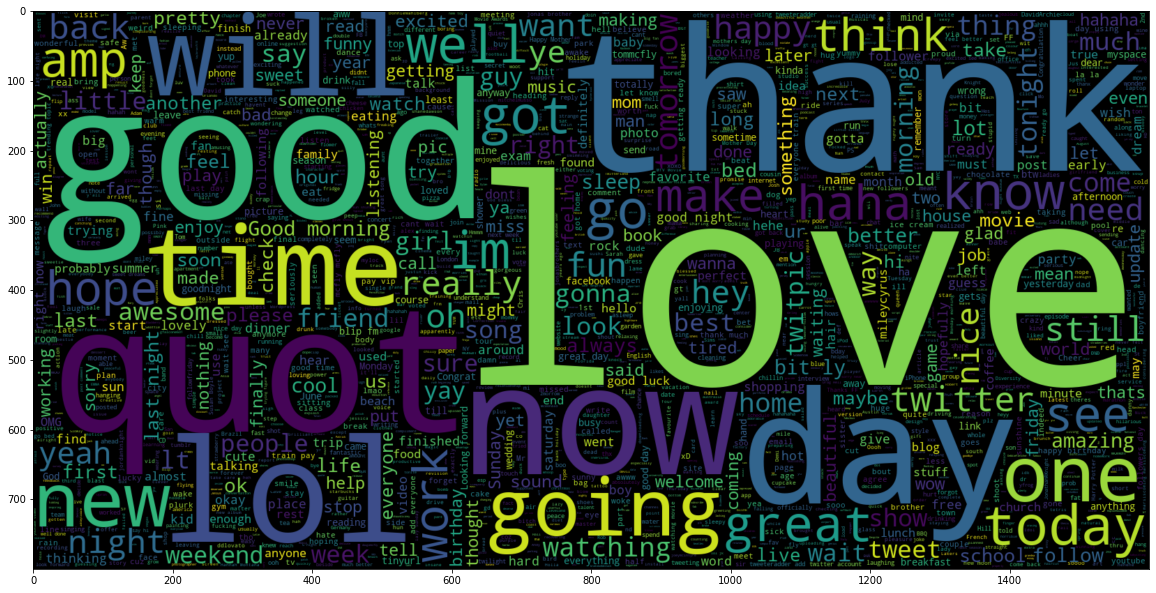

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

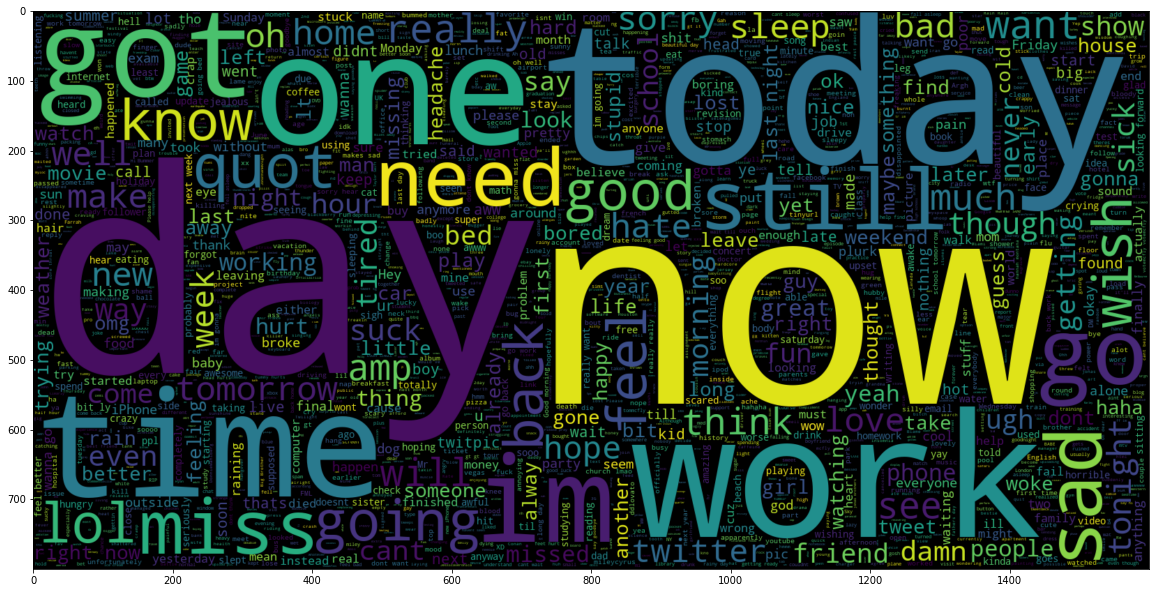

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 8000
Test Data size 2000


In [ ]:
type(test_data.text)

pandas.core.series.Series

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 16370


In [ ]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (8000, 30)
Testing X Shape: (2000, 30)


In [ ]:
labels = train_data.sentiment.unique().tolist()

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (8000, 1)
y_test shape: (2000, 1)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-05-08 12:36:45--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-08 12:36:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-08 12:36:45--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'drive/MyDrive/Sentiment//best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
8/8 [==============================] - 39s 398ms/step - loss: 0.6908 - accuracy: 0.5204 - val_loss: 0.6601 - val_accuracy: 0.6365
Epoch 2/10
8/8 [==============================] - 2s 225ms/step - loss: 0.6571 - accuracy: 0.6133 - val_loss: 0.5907 - val_accuracy: 0.6855
Epoch 3/10
8/8 [==============================] - 2s 228ms/step - loss: 0.6005 - accuracy: 0.6760 - val_loss: 0.5735 - val_accuracy: 0.7050
Epoch 4/10
8/8 [==============================] - 2s 219ms/step - loss: 0.5788 - accuracy: 0.7033 - val_loss: 0.5426 - val_accuracy: 0.7250
Epoch 5/10
8/8 [==============================] - 2s 227ms/step - loss: 0.5607 - accuracy: 0.7060 - val_loss: 0.5352 - val_accuracy: 0.7465
Epoch 6/10
8/8 [==============================] - 2s 255ms/step - loss: 0.5366 - accuracy: 0.7287 - val_loss: 0.5177 - val_accuracy: 0.7510
Epoch 7/10
8/8 [==============================] - 2s 245ms/step - loss: 0.5165 - accuracy: 0.7456 - val_loss: 0.5102 - val_accuracy: 0.7565
Epoch 8/10
8/8 [===

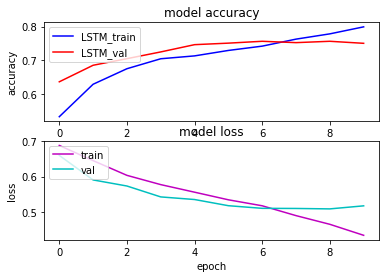

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

1/1 [==============================] - 1s 561ms/step


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

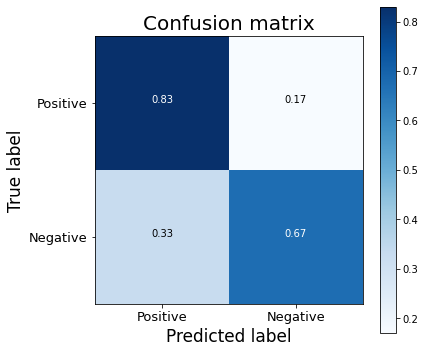

In [ ]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.71      0.83      0.77       988
    Positive       0.80      0.67      0.73      1012

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.75      0.75      2000



In [ ]:
I just re-pierced my ears

im sad now  Miss.Lilly

I need a hug

Damm back to school tomorrow 


The Life is cool. But not for Me. 

have a little headache ,but except from that i'm good 

3 am, writing a song 

Watching the Simpsons and having a generally laid-back afternoon 

In [ ]:
new_test=['I just re-pierced my ears','im sad now  Miss.Lilly','I need a hug','Damm back to school tomorrow','The Life is cool. But not for Me.','have a little headache ,but except from that im good','3 am, writing a song3 am, writing a song','Watching the Simpsons and having a generally laid-back afternoo']
new_test_t=pd.DataFrame(new_test,columns=['text'])
new_test_t
x_test_t = pad_sequences(tokenizer.texts_to_sequences(new_test_t.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

In [ ]:
scores = model.predict(x_test_t, verbose=1, batch_size=1)
scores

8/8 [==============================] - 1s 17ms/step


array([[0.17118295],
       [0.01611435],
       [0.15241632],
       [0.31939518],
       [0.4235023 ],
       [0.7007989 ],
       [0.52877104],
       [0.71264815]], dtype=float32)

In [ ]:
for i in range (0,len(new_test)):
  new_char=pd.DataFrame(new_test[i].split(),columns=['text'])
  # print(len(new_char['text']))
  new_char_t=pad_sequences(tokenizer.texts_to_sequences(new_char.text),maxlen = MAX_SEQUENCE_LENGTH)
  scores=model.predict(new_char_t,verbose=1,batch_size=1)
  for j in range (0,len(new_char['text'])):
    print(scores[j],new_char['text'][j])

5/5 [==============================] - 0s 14ms/step
[0.49056232] I
[0.55879515] just
[0.7701049] re-pierced
[0.34210166] my
[0.1467025] ears
4/4 [==============================] - 0s 14ms/step
[0.58430725] im
[0.0567103] sad
[0.44465792] now
[0.12769133] Miss.Lilly
4/4 [==============================] - 0s 14ms/step
[0.49056232] I
[0.31287128] need
[0.77227366] a
[0.726257] hug
5/5 [==============================] - 0s 15ms/step
[0.6295886] Damm
[0.40535957] back
[0.6531903] to
[0.34306103] school
[0.33242476] tomorrow
8/8 [==============================] - 0s 15ms/step
[0.5539419] The
[0.7870819] Life
[0.6655653] is
[0.91960025] cool.
[0.3352934] But
[0.3156805] not
[0.5687838] for
[0.2157639] Me.
10/10 [==============================] - 0s 15ms/step
[0.3123351] have
[0.77227366] a
[0.51372135] little
[0.01702163] headache
[0.3352934] ,but
[0.3002976] except
[0.54260117] from
[0.495046] that
[0.58430725] im
[0.9367032] good
9/9 [==============================] - 0s 15ms/step
[0.786023